<a href="https://colab.research.google.com/github/Uppala19/Airline-fare-Prediction/blob/main/final_project_msc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import holidays  # For marking holiday flights

import requests
import time


Load and Explore the Dataset

In [ ]:
# Load dataset
file_path = '/content/Data_Train.xlsx'  # Replace with your dataset path
data = pd.read_excel(file_path)

Size of data set

In [ ]:
data.shape

(10683, 11)

Inspect the dataset

In [ ]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.iloc[-3:]  # Retrieves the last 5 rows


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


#information about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [ ]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Check for missing values

In [ ]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


Adding some neccesary data fields to already existing excel data set

In [ ]:
pip install pandas openpyxl geopy requests datetime holidays


In [ ]:
data = pd.read_excel(file_path,engine='openpyxl')

Add Cabin Class

In [ ]:
cabin_classes = ['Economy', 'Business', 'First Class']
data['Cabin_Class'] = np.random.choice(cabin_classes, size=len(data))

Extract Layover Information from Route

In [ ]:
def get_layover(route):
    stops = route.count('→')  # Assuming route format like 'City1 → City2 → City3'
    return stops, "Direct" if stops == 0 else f"{stops} Stop(s)"

data[['Number_of_Stops', 'Flight_Layover']] = data['Route'].apply(lambda x: pd.Series(get_layover(str(x))))

Calculate Days Until Departure

In [ ]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
#Generate random booking dates (For real case, replace with actual data)
data['Booking_Date'] = data['Date_of_Journey'] - pd.to_timedelta(np.random.randint(1, 60, size=len(data)), unit='D')
#Compute days until departure
data['Days_Until_Departure'] = (data['Date_of_Journey'] - data['Booking_Date']).dt.days


 fetching holidays in 2019

In [ ]:
  import requests
  import pandas as pd

  # Replace with your actual API key from Calendarific
  API_KEY = "NGcTjMSkwkZd1LT0ltkzOf9UdY0EzJ2k"

  # Define the API endpoint for fetching holidays in 2019
  url = f"https://calendarific.com/api/v2/holidays?api_key={API_KEY}&country=IN&year=2019"

  # Make the API request
  response = requests.get(url)

  # Check if the request was successful
  if response.status_code == 200:
      holidays_data = response.json()

      # Extract holiday details
      holidays_list = holidays_data.get("response", {}).get("holidays", [])

      # Display the holiday details
      print(f"Airline Holidays for 2019 in India:\n")
      holiday_dates = []
      for holiday in holidays_list:
          holiday_date = holiday["date"]["iso"][:10] # Extract only the date part (YYYY-MM-DD)
          holiday_name = holiday["name"]
          holiday_type = holiday["type"]
          holiday_dates.append(holiday_date)
        # print(f"Date: {holiday_date} | Name: {holiday_name} | Type: {holiday_type}")

  else:
      print(f"Error: Unable to fetch holiday data (Status Code: {response.status_code})")

Airline Holidays for 2019 in India:



 Mark Holiday Season Flights

In [ ]:
    # Convert holiday dates to datetime format for comparison
    holiday_dates = pd.to_datetime(holiday_dates, format='%Y-%m-%d') # Specify the format

    # Mark flights as part of the holiday season (1 if holiday, 0 if not)
    data['Is_Holiday_Season'] = data['Date_of_Journey'].isin(holiday_dates).astype(int)
    #print(data)

Off-Peak Season Flag

In [ ]:
# Function to determine if the flight is in the peak season
def is_peak_season(row):
    # Define peak_months here
    peak_months = [12, 1, 2, 3, 4]  # Example: December to April are peak months

    # Check if the flight date is during a holiday or in peak months
    if row['Date_of_Journey'] in holiday_dates or row['Date_of_Journey'].month in peak_months:
        return 1  # Peak season
    return 0  # Non-peak season

# Apply the function to create the 'Is_Peak_Season' column
data['Is_Peak_Season'] = data.apply(is_peak_season, axis=1)
# Now, let's analyze fare prices during peak season vs non-peak season
peak_fares = data[data['Is_Peak_Season'] == 1]['Price']
non_peak_fares = data[data['Is_Peak_Season'] == 0]['Price']
# Calculate average fare for peak and non-peak season
average_peak_fare = peak_fares.mean()
average_non_peak_fare = non_peak_fares.mean()

#print(f"Average fare during peak season: {average_peak_fare}")
#print(f"Average fare during non-peak season: {average_non_peak_fare}")
#print(data)

adding Fuel price by using API  once check

In [ ]:
#import requests
#import pandas as pd

# Replace with your actual API key
API_KEY = "f695fbbb339ef3304ccefdd7091f56debe745901584075b65ef83213eba85aaf"

# Define the URL for the API request (this is just an example)
url = f"https://api.oilpriceapi.com/v1/prices?api_key={API_KEY}&start_date=2019-01-01&end_date=2019-12-31"
# Make the API request to get the latest fuel prices
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
  #Parse the response JSON
  fuel_data = response.json()

     # Extract the fuel prices from the response
  fuel_prices = pd.DataFrame(fuel_data['data'], columns=['date', 'price'])
  fuel_prices['date'] = pd.to_datetime(fuel_prices['date'])  # Convert to datetime



    # Merge the fuel prices with flight data based on the 'Date_of_Journey'
  data = data.merge(fuel_prices, left_on='Date_of_Journey', right_on='date', how='left')

    # Rename the 'price' column to 'Fuel_Price'
  data.rename(columns={'price': 'Fuel_Price'}, inplace=True)

    # Drop the 'date' column after merge
  data.drop(['date'], axis=1, inplace=True)

    # Display the merged data
  print(data)
else:
    print(f"Error: Unable to fetch fuel prices (Status Code: {response.status_code})")
#print(data)


Error: Unable to fetch fuel prices (Status Code: 401)


Adding Simulated Data to oil Prices

In [ ]:
fuel_price_data = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=365, freq='D'),
    'Fuel_Price': np.random.uniform(70, 120, size=365)  # Simulated prices
})

# Merge fuel prices with dataset
fuel_price_data['Date'] = pd.to_datetime(fuel_price_data['Date'])
data = data.merge(fuel_price_data, left_on='Booking_Date', right_on='Date', how='left', suffixes=('', '_fuel'))
data.rename(columns={'Fuel_Price_fuel': 'Oil_Price'}, inplace=True)
data.drop(columns=['Date'], inplace=True)
#print(data)

In [ ]:
print(data.head(5))

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Cabin_Class  Number_of_Stops Flight_Layover Booking_Date  \
0      Economy               

In [ ]:

data.to_excel("Updated_Flight_Fare_Data.xlsx", index=False, engine='openpyxl')

print("✅ Updated dataset saved successfully!")

✅ Updated dataset saved successfully!


save an updated file in Google Colab

In [ ]:
# Assuming the updated data is in a DataFrame called 'data'
data.to_csv('/content/updated_file.csv', index=False)


In [ ]:
#Fetch all Columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Cabin_Class', 'Number_of_Stops',
       'Flight_Layover', 'Booking_Date', 'Days_Until_Departure',
       'Is_Holiday_Season', 'Is_Peak_Season', 'Fuel_Price'],
      dtype='object')

Data Analysis And Visualization on train dataSet

In [ ]:
#to extract names of airlines from the data
unique_airlines = pd.unique(data["Airline"])
print(unique_airlines)


['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [ ]:
#Iterate through each column in the DataFrame and print the number of unique values in that column
for i in data:
    print(f"Number of unique values in {i} -->> {data[i].nunique()}")

Number of unique values in Airline -->> 12
Number of unique values in Date_of_Journey -->> 40
Number of unique values in Source -->> 5
Number of unique values in Destination -->> 6
Number of unique values in Route -->> 128
Number of unique values in Dep_Time -->> 222
Number of unique values in Arrival_Time -->> 1343
Number of unique values in Duration -->> 368
Number of unique values in Total_Stops -->> 5
Number of unique values in Additional_Info -->> 10
Number of unique values in Price -->> 1870
Number of unique values in Cabin_Class -->> 3
Number of unique values in Number_of_Stops -->> 6
Number of unique values in Flight_Layover -->> 6
Number of unique values in Booking_Date -->> 177
Number of unique values in Days_Until_Departure -->> 59
Number of unique values in Is_Holiday_Season -->> 2
Number of unique values in Is_Peak_Season -->> 2
Number of unique values in Fuel_Price -->> 177


In [ ]:
#Print the count of each unique value in every column
for i in data:
    print(data[i].value_counts())

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Date_of_Journey
2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-06-09    495
2019-06-12    493
2019-05-09    484
2019-03-21    423
2019-05-15    405
2019-03-06    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-06-01    342
2019-06-03    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-03-09    302
2019-03-27    299
2019-05-24    286
2019-05-06    282
2019-05-01    277
2019-05-12    259
2019-04-01    257
2019-03-01    

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,Flight_Layover,Booking_Date,Days_Until_Departure,Is_Holiday_Season,Is_Peak_Season,Fuel_Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Economy,1,1 Stop(s),2019-02-09,43,0,1,112.847883
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Economy,3,3 Stop(s),2019-03-24,38,1,1,86.776330
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Business,3,3 Stop(s),2019-04-28,42,0,0,90.984333
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,First Class,2,2 Stop(s),2019-03-24,49,1,1,86.776330
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Business,2,2 Stop(s),2019-02-20,9,1,1,72.791322


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Number_of_Stops'].plot(kind='hist', bins=20, title='Number_of_Stops')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Days_Until_Departure'].plot(kind='hist', bins=20, title='Days_Until_Departure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Airline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Route').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Price', y='Number_of_Stops', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Number_of_Stops', y='Days_Until_Departure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Days_Until_Departure', y='Is_Holiday_Season', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_of_Journey']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date_of_Journey', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Airline')):
  _plot_series(series, series_name, i)
  fig.legend(title='Airline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_of_Journey']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Date_of_Journey', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Source')):
  _plot_series(series, series_name, i)
  fig.legend(title='Source', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_of_Journey']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Date_of_Journey', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Destination')):
  _plot_series(series, series_name, i)
  fig.legend(title='Destination', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_of_Journey']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Date_of_Journey', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Route')):
  _plot_series(series, series_name, i)
  fig.legend(title='Route', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_of_Journey')
_ = plt.ylabel('Price')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Number_of_Stops'].plot(kind='line', figsize=(8, 4), title='Number_of_Stops')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Days_Until_Departure'].plot(kind='line', figsize=(8, 4), title='Days_Until_Departure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Source'].value_counts()
    for x_label, grp in _df_20.groupby('Airline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Airline')
_ = plt.ylabel('Source')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Destination'].value_counts()
    for x_label, grp in _df_21.groupby('Source')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Source')
_ = plt.ylabel('Destination')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Route'].value_counts()
    for x_label, grp in _df_22.groupby('Destination')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Destination')
_ = plt.ylabel('Route')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Dep_Time'].value_counts()
    for x_label, grp in _df_23.groupby('Route')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Route')
_ = plt.ylabel('Dep_Time')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Airline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='Airline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Source'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='Source', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Destination'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='Destination', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Route'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='Route', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

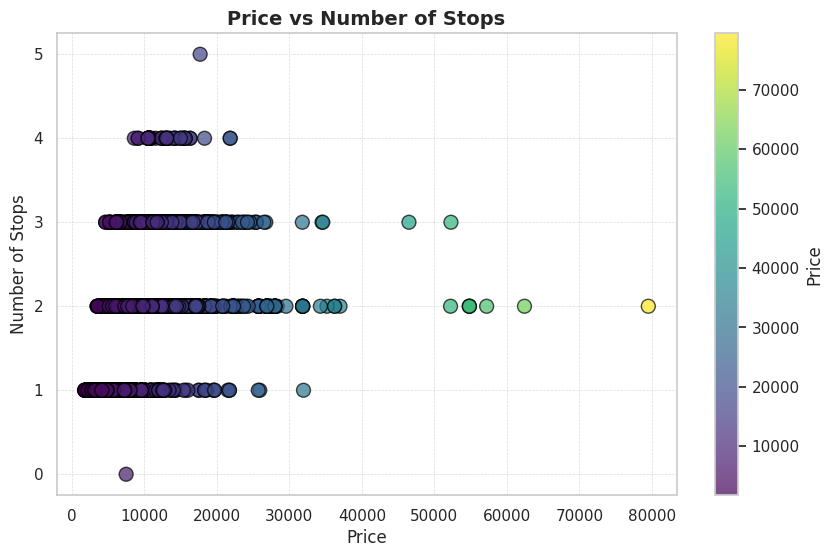

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot with customized aesthetics
plt.figure(figsize=(10, 6))

# Use a color map to represent the data more beautifully
plt.scatter(data['Price'], data['Number_of_Stops'], s=100, alpha=0.7, c=data['Price'], cmap='viridis', edgecolors='black')

# Add a color bar to indicate the price scale
plt.colorbar(label='Price')

# Customize plot title and labels
plt.title('Price vs Number of Stops', fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Number of Stops', fontsize=12)

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Show the plot
plt.show()


Distribution of Flights Across Airlines ✈️

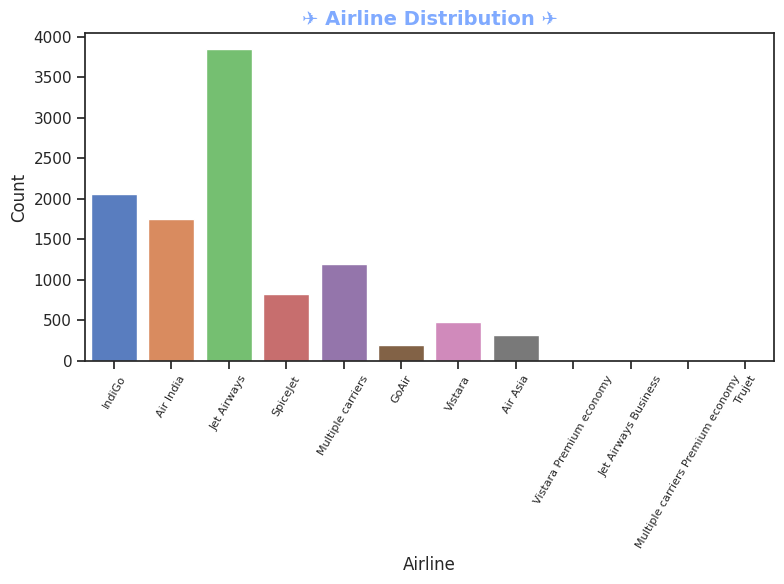

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a nice style
sns.set(style="ticks")

# Create the countplot with a color palette
plt.figure(figsize=(8, 6))
sns.countplot(x="Airline", data=data, hue="Airline",palette="muted",legend=False)


# Title and labels with styling
plt.title("✈️ Airline Distribution ✈️", fontweight="bold", fontsize=14, color="#80aaff")
plt.xlabel("Airline")
plt.ylabel("Count")

# Rotate x-tick labels for better readability
plt.xticks(rotation=60, fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


Visualizing how ticket fares vary across different airlines over the journey dates



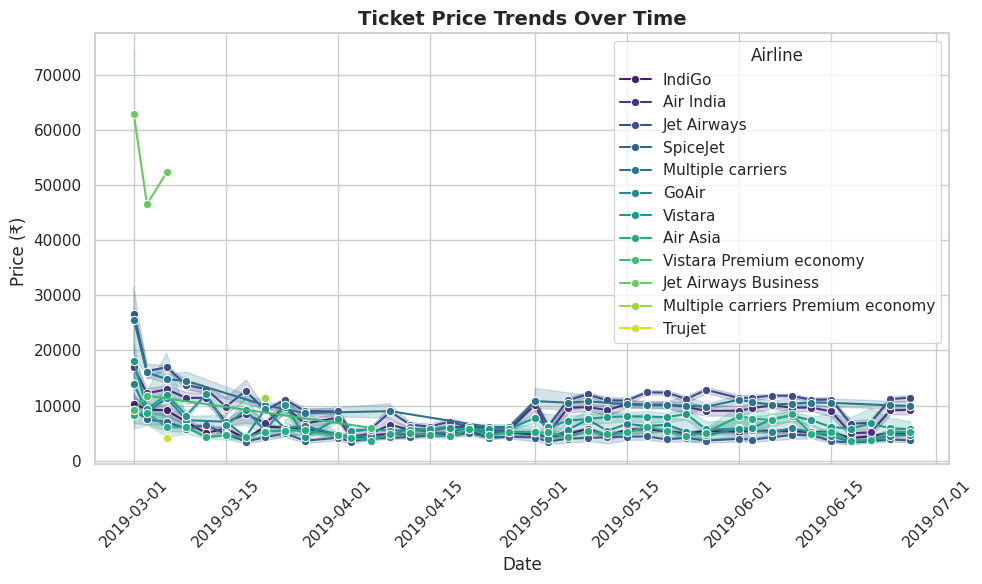

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date_of_Journey", y="Price", data=data, hue="Airline", marker="o", palette="viridis") # Changed x to "Date_of_Journey" and y to "Price"

# Add title and labels
plt.title("Ticket Price Trends Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (₹) ", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


The distribution of bookings as the departure date approaches.

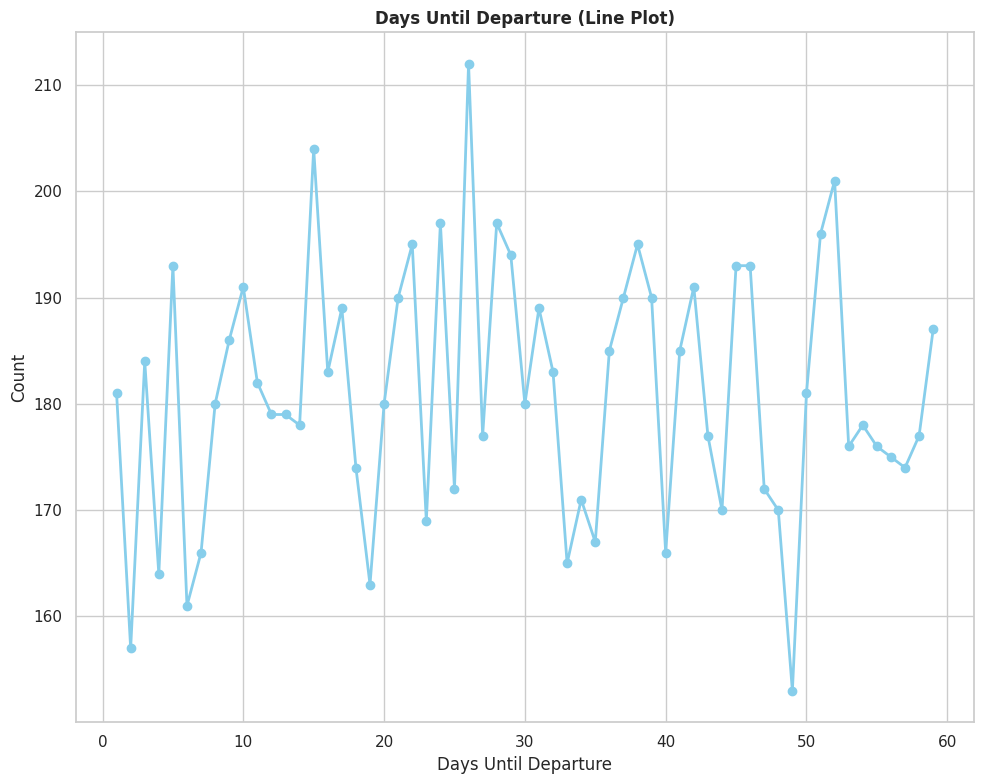

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Days_Until_Departure' is in your data, we first calculate the frequency of each unique value
days_count = data['Days_Until_Departure'].value_counts().sort_index()

# Create a line plot for 'Days_Until_Departure'
plt.figure(figsize=(10,8))
plt.plot(days_count.index, days_count.values, marker='o', color='skyblue', linewidth=2)

# Add title and labels
plt.title('Days Until Departure (Line Plot)', fontsize=12, fontweight='bold')
plt.xlabel('Days Until Departure', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Remove top and right spines for a clean look
#plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()
